170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 19s 11ms/step - loss: 1.9176 - accuracy: 0.3108 - val_loss: 1.8276 - val_accuracy: 0.3243
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7788 - accuracy: 0.3632 - val_loss: 1.7475 - val_accuracy: 0.3783
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7325 - accuracy: 0.3858 - val_loss: 1.7136 - val_accuracy: 0.3872
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7074 - accuracy: 0.3912 - val_loss: 1.7202 - val_accuracy: 0.3796
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6879 - accuracy: 0.3991 - val_loss: 1.6718 - val_accuracy: 0.4105
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6753 - accuracy: 0.4029 - val_loss: 1.6781 - val_accuracy: 0.4039
Epoch 7/10
1563/1563 [==============================] - 13s 8m

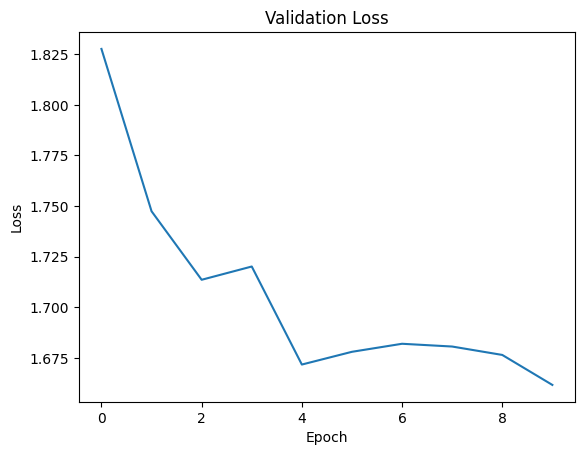

313/313 - 1s - loss: 1.6617 - accuracy: 0.3991 - 674ms/epoch - 2ms/step
Test Loss: 1.6617070436477661
Test Accuracy: 0.39910000562667847
313/313 [==============================] - 1s 2ms/step


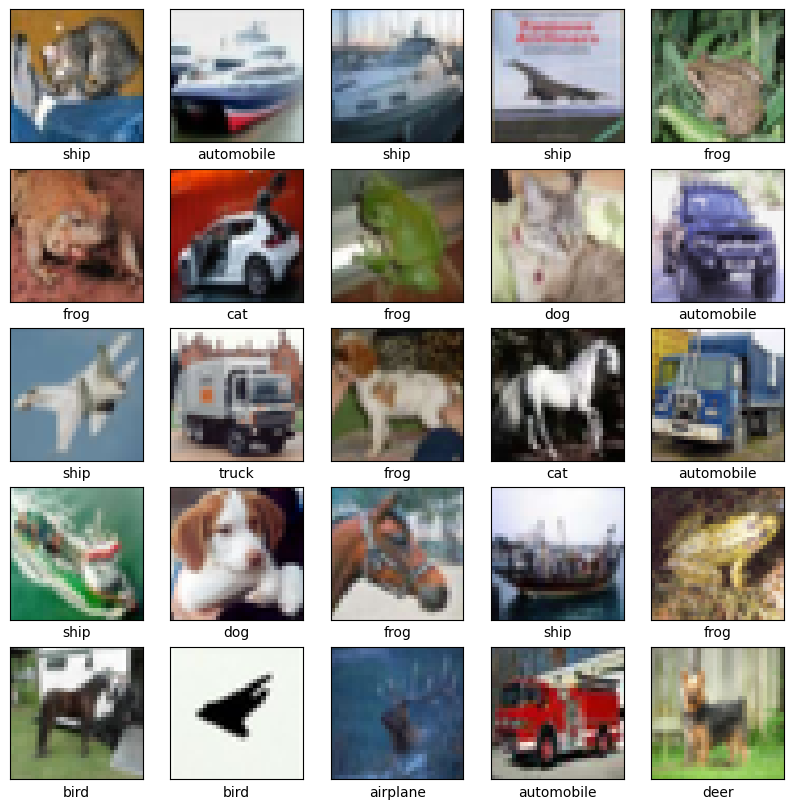

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Define model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot validation loss over epochs
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Make predictions on some test samples
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Show example predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[predicted_labels[i]])
plt.show()


# **Deep Learning **

Epoch 1/10
1563/1563 [==============================] - 136s 86ms/step - loss: 1.3893 - accuracy: 0.4966 - val_loss: 1.0999 - val_accuracy: 0.6138
Epoch 2/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.9778 - accuracy: 0.6555 - val_loss: 0.8837 - val_accuracy: 0.6928
Epoch 3/10
1563/1563 [==============================] - 131s 84ms/step - loss: 0.8167 - accuracy: 0.7148 - val_loss: 0.8903 - val_accuracy: 0.6855
Epoch 4/10
1563/1563 [==============================] - 131s 84ms/step - loss: 0.7229 - accuracy: 0.7477 - val_loss: 0.8685 - val_accuracy: 0.7009
Epoch 5/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.6431 - accuracy: 0.7748 - val_loss: 0.8458 - val_accuracy: 0.7157
Epoch 6/10
1563/1563 [==============================] - 131s 84ms/step - loss: 0.5761 - accuracy: 0.7958 - val_loss: 0.8586 - val_accuracy: 0.7162
Epoch 7/10
1563/1563 [==============================] - 131s 84ms/step - loss: 0.5096 - accuracy: 0.8190 - val_loss: 0

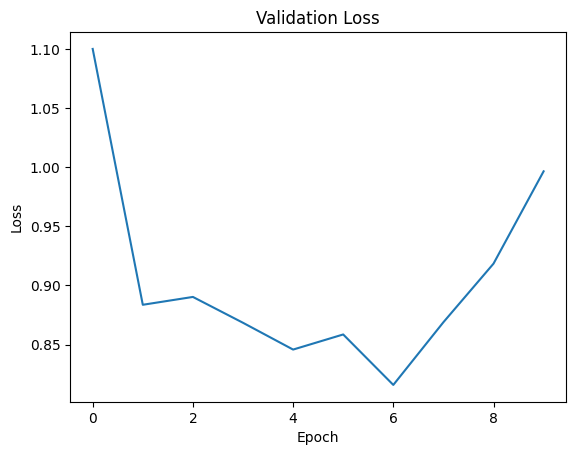

313/313 - 6s - loss: 0.9965 - accuracy: 0.7132 - 6s/epoch - 19ms/step
Test Loss: 0.9964622259140015
Test Accuracy: 0.7131999731063843
313/313 [==============================] - 8s 25ms/step


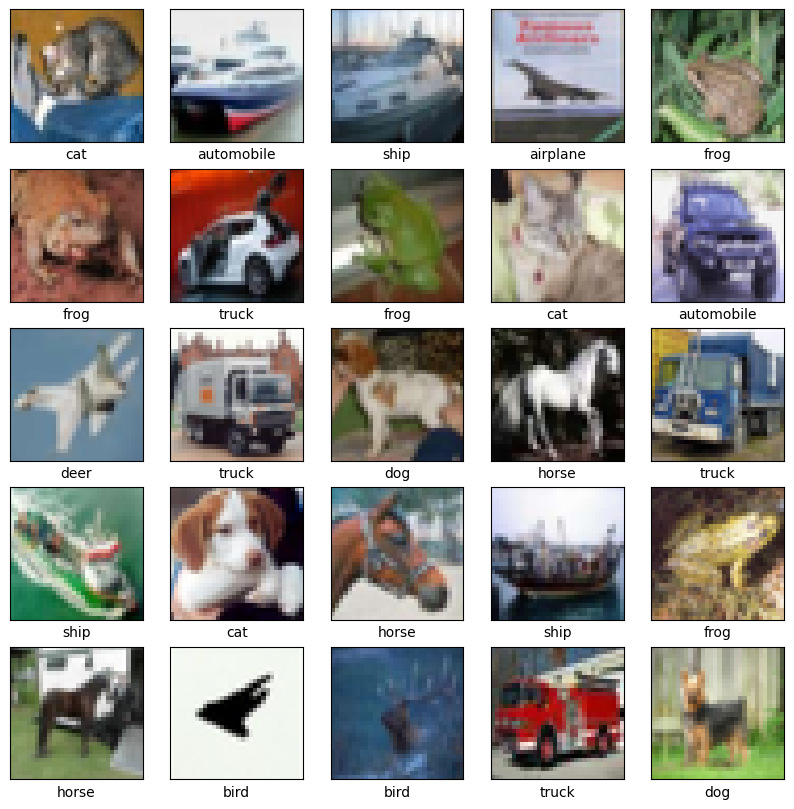

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Define model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot validation loss over epochs
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Make predictions on some test samples
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Show example predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[predicted_labels[i]])
plt.show()
